# <b> Project 1, Topic 2: Random Constellations and Mythology Generator

## By: Xander Graves and Alexis Walker

# <b> Table of Contents:

    Code Cell 1: Imports and Basic Information
    Code Cell 2: Creation of Random Constellations
    Code Cell 3: LLM Mythology Generation
    Code Cell 4: Streamlit

# <b> Code Cell 1: Imports and Basic Information

In [2]:
import numpy as np
import warnings
import litellm
import math
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import random
from sklearn.cluster import KMeans

custom_api_base = "https://litellmproxy.osu-ai.org/"
#OSU's LiteLLM proxy server.

from dotenv import load_dotenv
load_dotenv()
#Loading the .env file.

astro1221_key = os.getenv("ASTRO1221_API_KEY")
#Class API key.
if astro1221_key:
    print("Key found")
else:
    print("Did not find key")
    
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")
#Removing unnecessary warnings.

Key found


# <b> Code Cell 2: Creation of Random Constellations

c:\Users\awalk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


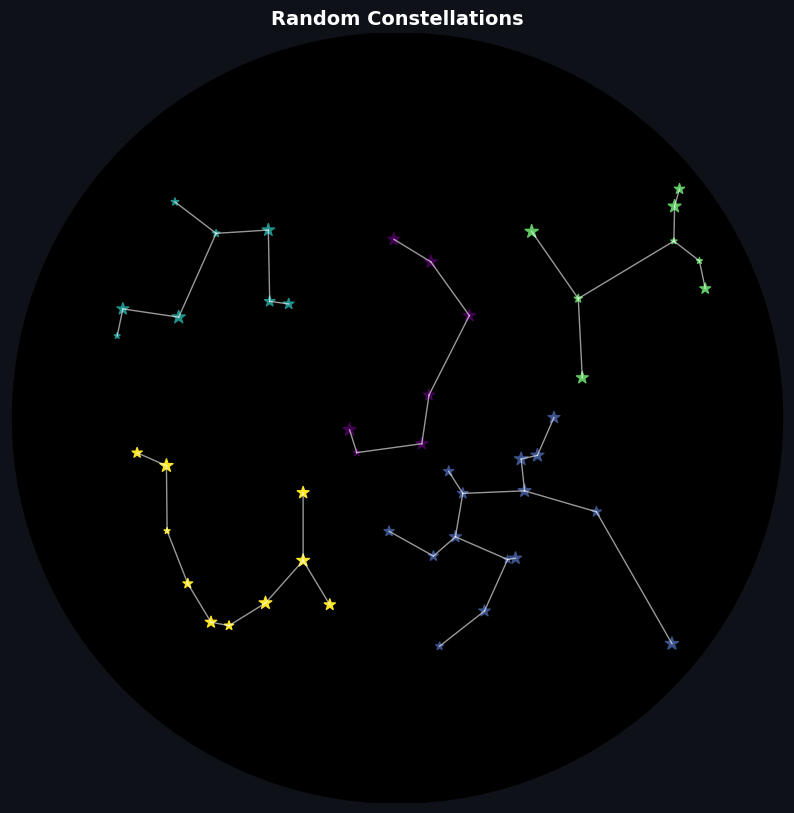

In [ ]:

def generate_random_constellations(num_stars = random.randrange(30, 50) , num_connections= random.randrange(10, 20)):
    #This is to make it easier to call this definition for later constellations.
#    if num_stars<12:
#        num_connections<6
        #Doing this makes sure that the constellation is only between a certain number of stars.

    fig, ax = plt.subplots(figsize=(10,10), facecolor= '#0e1117')
    ax.set_facecolor("#0e1117")
    #Makes the background of the plot black, a stylistic choice.

    circle = Circle((0, 0), radius=5, color='black', fill = True)

    ax.add_patch(circle)

    ax.set_aspect('equal', adjustable='datalim')

    ax.set_xlim(-4,4)
    ax.set_ylim(-3,3)

    x_vals = np.random.uniform(-4, 4, num_stars)
    y_vals = np.random.uniform(-3, 3, num_stars)
    #Randomizes the location of the stars.

    Constellations = {
        "Coordinates": [x_vals, y_vals]
        }
    #Saves the coordinates into a dictionary.
    
    sizes = np.random.randint(20, 100, num_stars)
    #Randomizes the size of each star.


    
    connections = np.random.choice(num_stars,(num_connections, 2), replace=True)
    #Randomizes the connections between stars.

    # Cluster stars once (coordinates need shape (num_stars, 2) for KMeans)
    coords = np.column_stack((x_vals, y_vals))
    kmeans = KMeans(n_clusters=5, n_init=10)
    kmeans.fit(coords)
    labels = kmeans.labels_  # cluster index for each star

    # Draw Line2D using a minimum spanning tree to limit connections.
    for cluster_id in range(kmeans.n_clusters):
        indices = np.where(labels == cluster_id)[0]
        n = len(indices)
        if n < 2:
            continue
        px = x_vals[indices]
        py = y_vals[indices]
        #Picking best points for connections
        in_tree = np.zeros(n, dtype=bool)
        in_tree[0] = True
        for _ in range(n - 1):
            best_a, best_b, best_d2 = -1, -1, np.inf
            for a in np.where(in_tree)[0]:
                for b in np.where(~in_tree)[0]:
                    d2 = (px[a] - px[b])**2 + (py[a] - py[b])**2
                    if d2 < best_d2:
                        best_d2, best_a, best_b = d2, a, b
            in_tree[best_b] = True
            idx_a, idx_b = indices[best_a], indices[best_b]
            connection = plt.Line2D(
                [x_vals[idx_a], x_vals[idx_b]],
                [y_vals[idx_a], y_vals[idx_b]],
                color='white', alpha=0.6, linewidth=1
            )
            #using ax.add_line to add the Line2D to the graph
            ax.add_line(connection)

    ax.scatter(x_vals, y_vals, s=sizes, marker='*', c=kmeans.labels_, alpha=1)
    #Plots stars.

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    #Sylistic choice, removes the axes.

    plt.title("Random Constellations", fontsize=14, fontweight="bold", color='white')
    fig.savefig(fname="astroplot.png")


generate_random_constellations()

# <b> Code Cell 3: LLM and Mythology Generation

In [ ]:
import base64

# Opening the file and reading it as binary
with open("astroplot.png", "rb") as f:
    # Reading the image as binary and converting to Base64
    encoded_image = base64.b64encode(f.read()).decode('utf-8')
    

# Prompting the LLM and setting max token values
response = litellm.completion(
    model = "openai/GPT-4.1-mini",
    messages = [
        {"role": "system", "content": "You are a Greek theologian, and have to create a story from the given stars. Use Greek myth stories as a base for these, as a storyteller."},
        #Context for the LLM
        {"role": "user", "content": [
            {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}
            #The encoded image being sent to the LLM
        ]}
    ],
    max_tokens = 1000,
    api_base=custom_api_base,
    api_key=astro1221_key,
    temperature=.3
    #LiteLLM Parameters
    )
print(response)

# <b> Code Cell 4: Streamlit

In [ ]:
import streamlit as st

st.title("Random Constellations Generator with Mythology")
#Title for our streanlit webpage!
st.write("This is a constellation generator, where we incorporate LLM into generating mythology with the set of constellations you recieve :)")
#Extra preface
st.image("astroplot.png")
